In [1]:
from keras.datasets import  mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Load MNIST data

In [2]:
(x_Train,y_Train),(x_Test,y_Test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [3]:
# reshape the image
x_Train4D = x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D = x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [4]:
# normalize the data
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [5]:
# convert class vectors to binary class matrices
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)
# Now we have the trainind data and testing data

Set up model

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [7]:
model = Sequential()

The first convolution layer

In [8]:
model.add(Conv2D(filters=16,
                kernel_size=(5,5),
                padding='same',
                input_shape=(28,28,1),
                activation='relu'))

The first MaxPooling layer

In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))

The second convolution layer

In [10]:
model.add(Conv2D(filters=36,
                kernel_size=(5,5),
                padding='same',
                activation='relu'))

Create Maxpooling layer 2 and add Dropout to avoid overfitting

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

Flatten layer. Convert the 36 7*7 images in the previously pooling layer 2 into a latitude vector. The length is 36*7*7=1764 Float numbers, corresponding to 1764 neurons.

In [12]:
model.add(Flatten())

Add hidden layer and dropout layer
It means it has 128 hidden nodes and 50% of neurons are randomly dropped in each training iteration

In [13]:
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

use softmax function in output layer

In [14]:
model.add(Dense(10,activation='softmax'))

In [15]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1764)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

Compile the model

We use model.compile() to configure the learning process before training the model. This is where you define the type of loss function, optimizer and the metrics evaluated by the model during training and testing.

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Train the model

In [17]:
train_history = model.fit(x=x_Train4D_normalize,
                     y=y_TrainOneHot,validation_split=0.2,
                     epochs=10,batch_size=300,verbose=2)

Epoch 1/10
160/160 - 19s - loss: 0.4887 - accuracy: 0.8456 - val_loss: 0.0998 - val_accuracy: 0.9707
Epoch 2/10
160/160 - 9s - loss: 0.1370 - accuracy: 0.9602 - val_loss: 0.0642 - val_accuracy: 0.9811
Epoch 3/10
160/160 - 9s - loss: 0.0994 - accuracy: 0.9706 - val_loss: 0.0530 - val_accuracy: 0.9845
Epoch 4/10
160/160 - 9s - loss: 0.0817 - accuracy: 0.9759 - val_loss: 0.0461 - val_accuracy: 0.9861
Epoch 5/10
160/160 - 9s - loss: 0.0719 - accuracy: 0.9779 - val_loss: 0.0415 - val_accuracy: 0.9874
Epoch 6/10
160/160 - 10s - loss: 0.0613 - accuracy: 0.9820 - val_loss: 0.0393 - val_accuracy: 0.9889
Epoch 7/10
160/160 - 10s - loss: 0.0559 - accuracy: 0.9836 - val_loss: 0.0377 - val_accuracy: 0.9884
Epoch 8/10
160/160 - 9s - loss: 0.0491 - accuracy: 0.9856 - val_loss: 0.0363 - val_accuracy: 0.9893
Epoch 9/10
160/160 - 10s - loss: 0.0450 - accuracy: 0.9865 - val_loss: 0.0347 - val_accuracy: 0.9900
Epoch 10/10
160/160 - 10s - loss: 0.0396 - accuracy: 0.9878 - val_loss: 0.0348 - val_accuracy: 0

Visualization

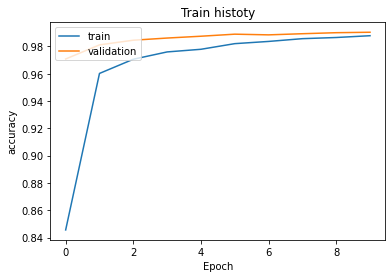

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train histoty')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation',],loc = 'upper left')
    plt.show()

show_train_history(train_history,'accuracy','val_accuracy')

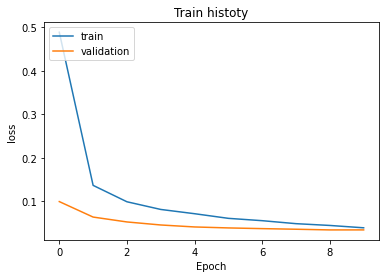

In [21]:
show_train_history(train_history,'loss','val_loss')

Evaluation

In [22]:
scores = model.evaluate(x_Test4D_normalize,y_TestOneHot)
print('accuracy=',scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0244 - accuracy: 0.9921
accuracy= 0.9921000003814697


Prediction

In [23]:
predicition = model.predict_classes(x_Test4D_normalize)

/home/hkuit104/anaconda3/envs/keras/lib/python3.7/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [24]:
predicition[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

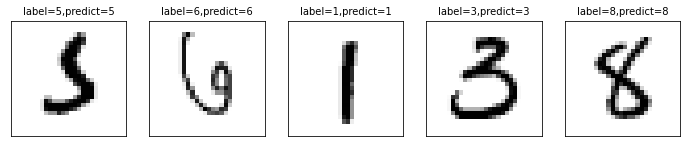

In [25]:
def plot_image_labels_prediction(images,labels,prediction,idx,num=20):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    num=5
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title = "label="+str(labels[idx])
        if len(prediction)>0:
            title +=",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

plot_image_labels_prediction(x_Test,y_Test,predicition,idx=340)

Confusion matrix

In [27]:
import pandas as pd
pd.crosstab(y_Test,predicition,rownames=['label'],colnames=['predict'])


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,1,0,0,0,0,3,1,0,0
1,0,1133,1,0,0,0,1,0,0,0
2,1,1,1026,0,0,0,1,2,1,0
3,0,0,2,1004,0,2,0,1,1,0
4,0,0,0,0,979,0,1,0,1,1
5,1,0,0,2,0,884,2,1,0,2
6,1,2,0,0,1,2,952,0,0,0
7,0,3,4,0,0,0,0,1019,1,1
8,3,0,2,0,0,1,0,2,963,3
